# Core/Envelope Rotation of Evolved Stars

Figure 10.4 from Chapter 10 of *Stellar Structure & Evolution* Pinsonneault & Ryden, Cambridge 
University Press.

Plot of rotation period for cores and envelopes of evolved stars from subgiant to helium-burning red clump stars.

Data are derived from Aerts et al. [2019, ARA&A, 57, 35](https://ui.adsabs.harvard.edu/abs/2019ARA%26A..57...35A) (and references therein), and Deheuvels et al. [2020, A&A, 641, 117](https://ui.adsabs.harvard.edu/abs/2020A%26A...641A.117D). Data were prepared for this figure by Jamie Tayar (U. Florida).

In [1]:
%matplotlib inline

import os
import sys
import math
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator, LogLocator, NullFormatter

import warnings
warnings.filterwarnings('ignore',category=UserWarning, append=True)

## Standard Plot Format

Setup the standard plotting format and make the plot.

In [2]:
plotFile = 'Fig10_4.png' 

# graphic aspect ratio = width/height

aspect = 4.0/3.0

#
# Don't change these unless you really need to (we never have)
#
# fPage is the horizontal fraction of the page occupied by the figure, default 1.0
#
# scaleFac is the LaTeX includegraphics scaling in units of \textwidth, default 1.0
#

fPage = 1.0
scaleFac = 0.85

# Text width in inches - don't change, this is defined by the print layout

textWidth = 6.0 # inches

# Graphic dimensions depending on bitmap or vector format (draft vs production)

dpi = 600
plotWidth = dpi*fPage*textWidth
plotHeight = plotWidth/aspect
axisFontSize = 12
labelFontSize = 8
lwidth = 0.5
axisPad = 5
wInches = fPage*textWidth # float(plotWidth)/float(dpi)
hInches = wInches/aspect  # float(plotHeight)/float(dpi)
    
# LaTeX is used throughout for markup of symbols, Times-Roman serif font

plt.rc('text', usetex=True)
plt.rc('font', **{'family':'serif','serif':['Times-Roman'],'weight':'bold','size':'16'})

# Font and line weight defaults for axes

matplotlib.rc('axes',linewidth=lwidth)
matplotlib.rcParams.update({'font.size':axisFontSize})

# axis and label padding

plt.rcParams['xtick.major.pad']=f'{axisPad}'
plt.rcParams['ytick.major.pad']=f'{axisPad}'
plt.rcParams['axes.labelpad'] = f'{axisPad}'

## Core/envelope rotation periods

Data table is a compilation of data from Aerts et al. and Deheuvels et al. by Jamie Tayar.

In [3]:
dataFile = 'CoreEnvelope.txt'

data = pd.read_csv(dataFile,sep=r'\s+',comment='#')
coreProt = np.array(data['Pcore'])
envProt = np.array(data['Penv'])
logg = np.array(data['logg'])

# plotting limits

minlogg = 2.5 # cgs
maxlogg = 4.1

minProt = 5.0  # days
maxProt = 1500. 

# dividers between star types in logg

sg_rg = 3.38 # subgiant/red giant
rg_rc = 2.97 # red giant/clump giant


## Figure 10.4 - core/envelope rotation periods

Plot the core P<sub>rot</sub> as a filled circle, envelope P<sub>rot</sub> as an open square.  Dividing lines are drawn between subgiants, red giants, and red clump stars, as follows:
 * Subgiant/Red Giant: log<sub>10</sub>(g)=3.39
 * Red Giant/Red Clump: log<sub>10</sub>(g)=2.97
 
We plot log(g) in reverse order so left-to-right along the horizontal axis is the evolutionary progression
from subgiant to red giant to red clump stars.

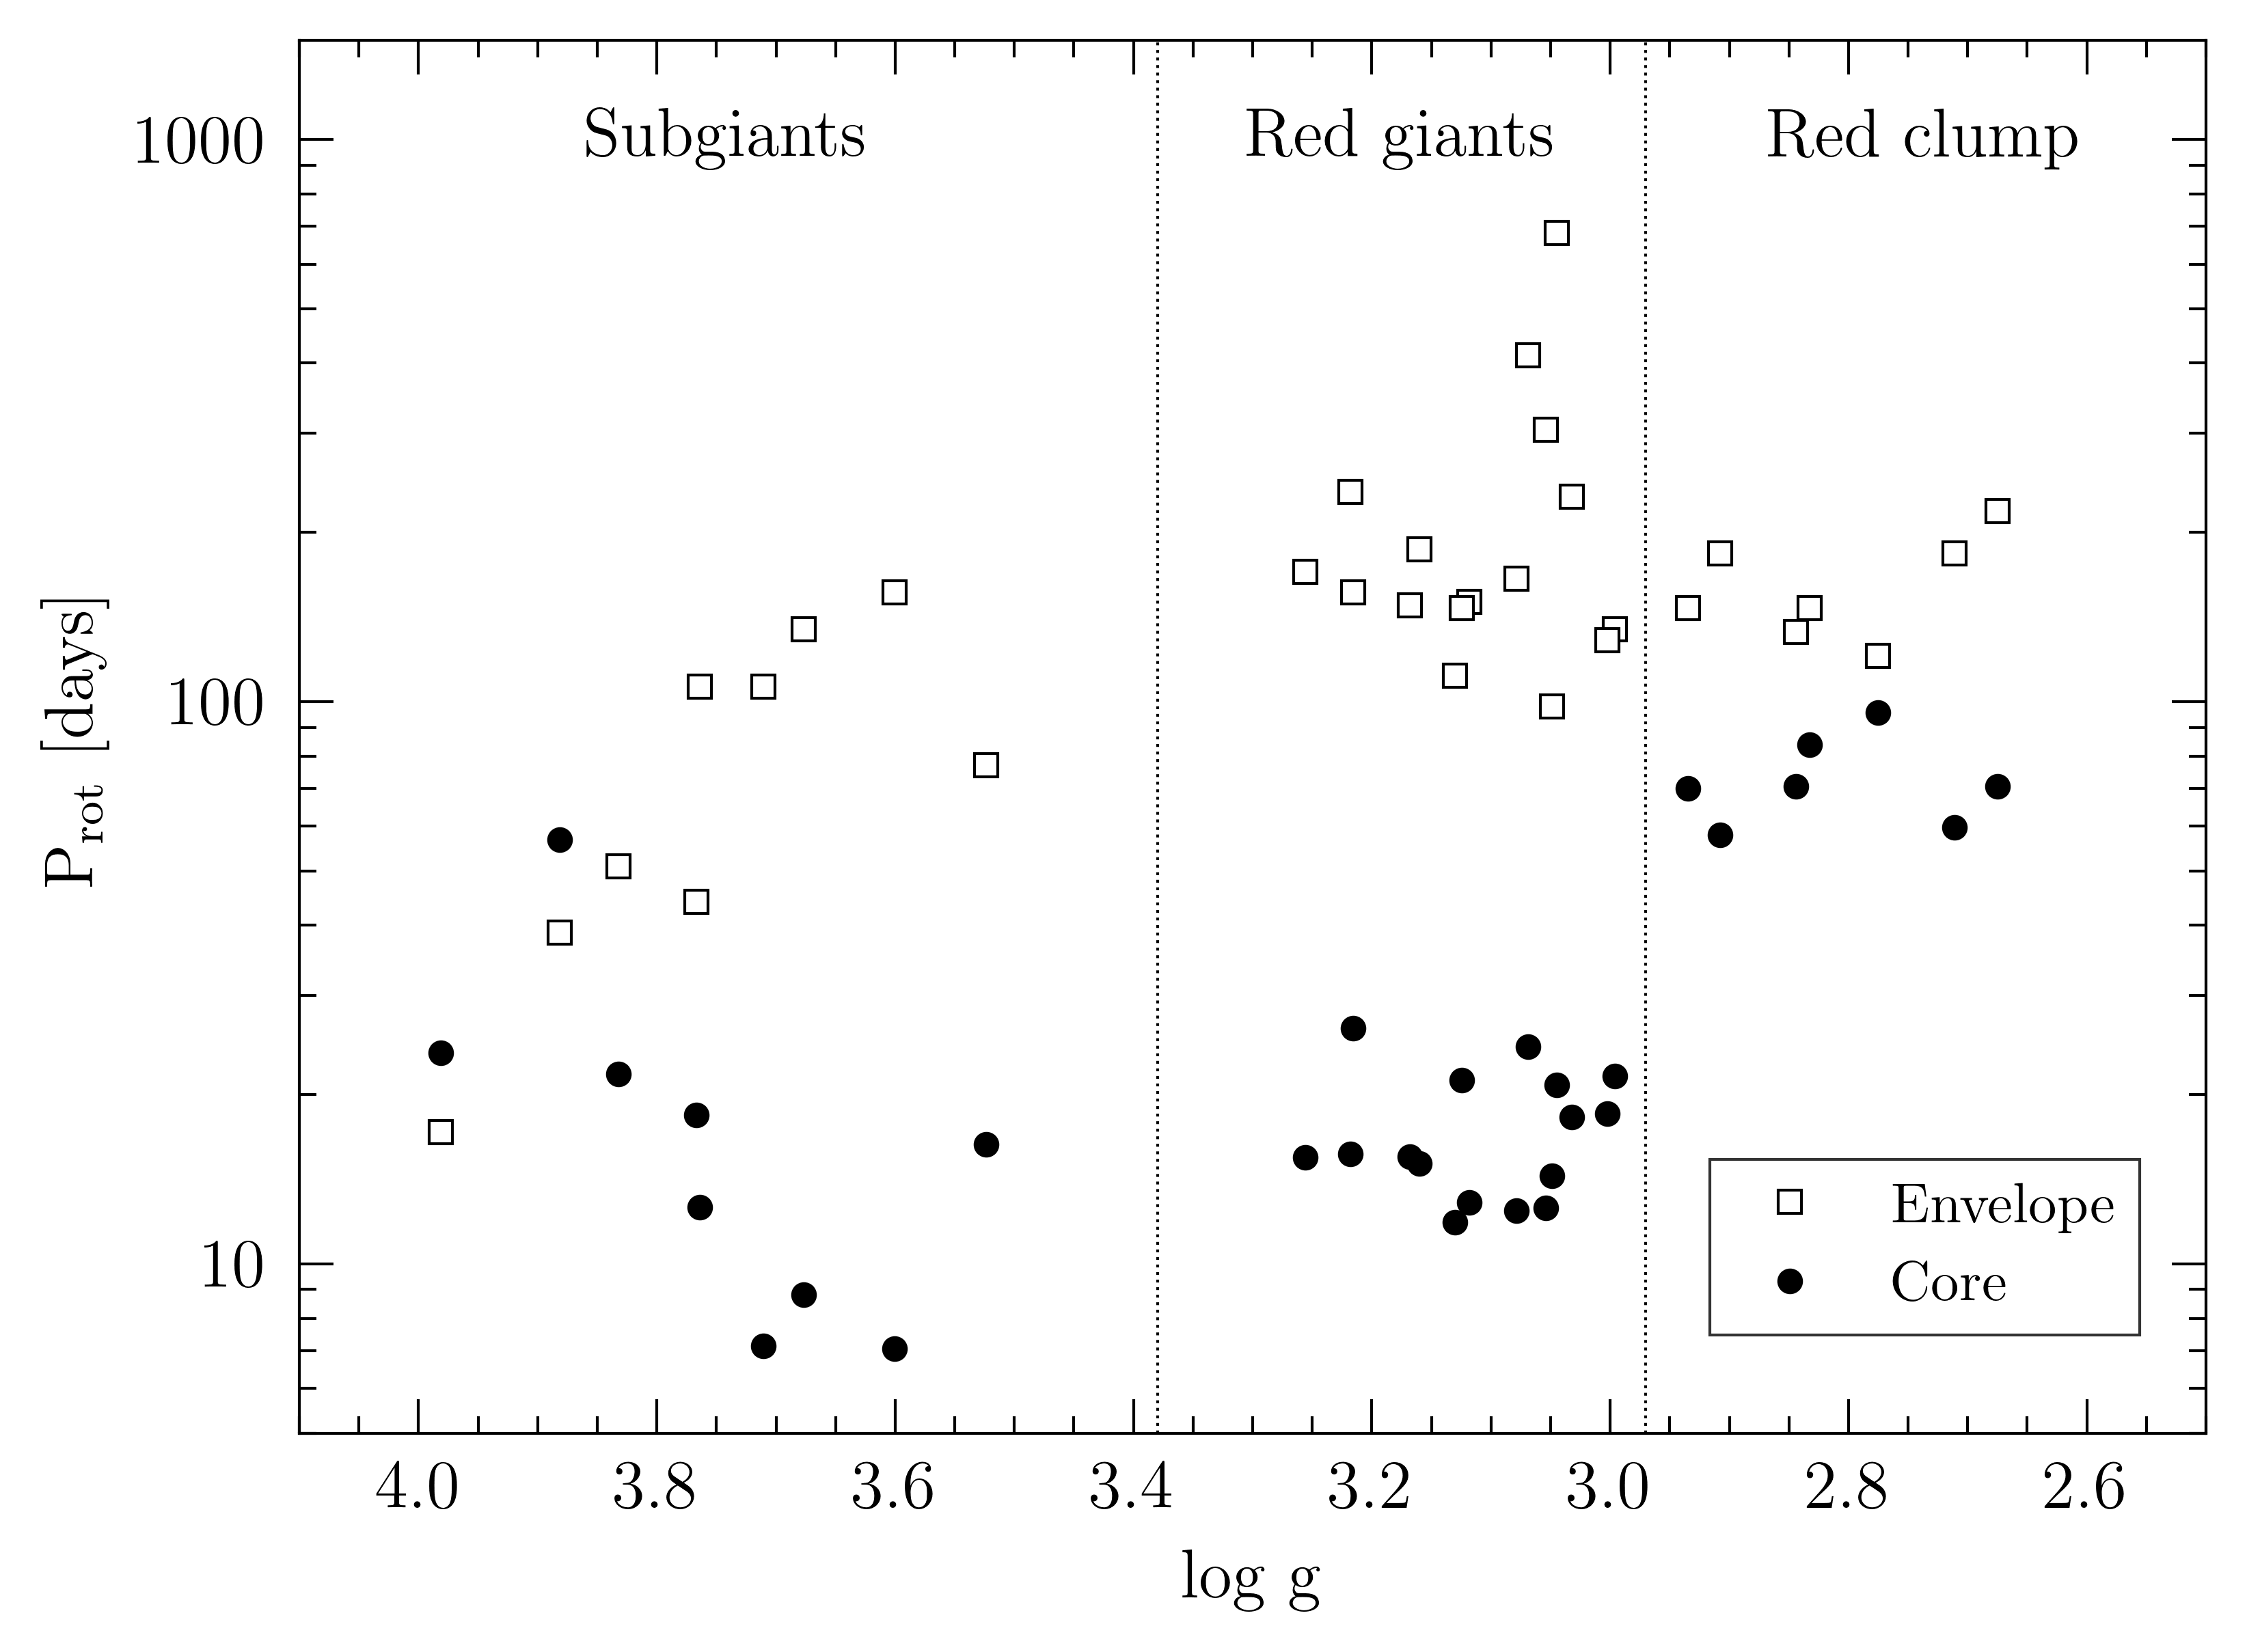

In [4]:
fig,ax = plt.subplots(figsize=(wInches,hInches),dpi=dpi)

ax.tick_params('both',length=6,width=lwidth,which='major',direction='in',top='on',right='on')
ax.tick_params('both',length=3,width=lwidth,which='minor',direction='in',top='on',right='on')
ax.set_xlim(maxlogg,minlogg)
ax.xaxis.set_major_locator(MultipleLocator(0.2))
ax.xaxis.set_minor_locator(MultipleLocator(0.05))
ax.set_xlabel(r'log g',fontsize=axisFontSize)
ax.set_ylim(minProt,maxProt)
ax.set_yscale('log')
ax.set_ylabel(r'P$_{\rm rot}$ [days]',fontsize=axisFontSize)
ax.set_yticks([10,100,1000])
ax.set_yticklabels(['10','100','1000'])

ax.plot(logg,envProt,'s',ms=4,mew=0.5,mfc='white',mec='black',zorder=10,label='Envelope')
ax.plot(logg,coreProt,'o',ms=4,mew=0.5,mfc='black',mec='black',zorder=10,label='Core')

legend = ax.legend(fontsize=10,loc='lower right',fancybox=False,edgecolor='black',bbox_to_anchor=(0.98,0.05))
frame = legend.get_frame()
frame.set_linewidth(0.5)

# Dividers between evolved star types

ax.vlines([sg_rg,rg_rc],minProt,maxProt,ls=[':'],color='black',lw=0.5,zorder=10)

# label the evolve star time ranges

yLabel = 1000
ax.text(0.5*(maxlogg+sg_rg),yLabel,'Subgiants',va='center',ha='center',fontsize=axisFontSize)
ax.text(0.5*(sg_rg+rg_rc),yLabel,'Red giants',va='center',ha='center',fontsize=axisFontSize)
ax.text(0.5*(rg_rc+minlogg),yLabel,'Red clump',va='center',ha='center',fontsize=axisFontSize)

# make the plot

plt.plot()
plt.savefig(plotFile,bbox_inches='tight',facecolor='white')